# Regressão - parte 1

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [124]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Statsmodels
import statsmodels.formula.api as smf # stats model formula

In [125]:
# Carregando o dataset e adicionando determinados elementos

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

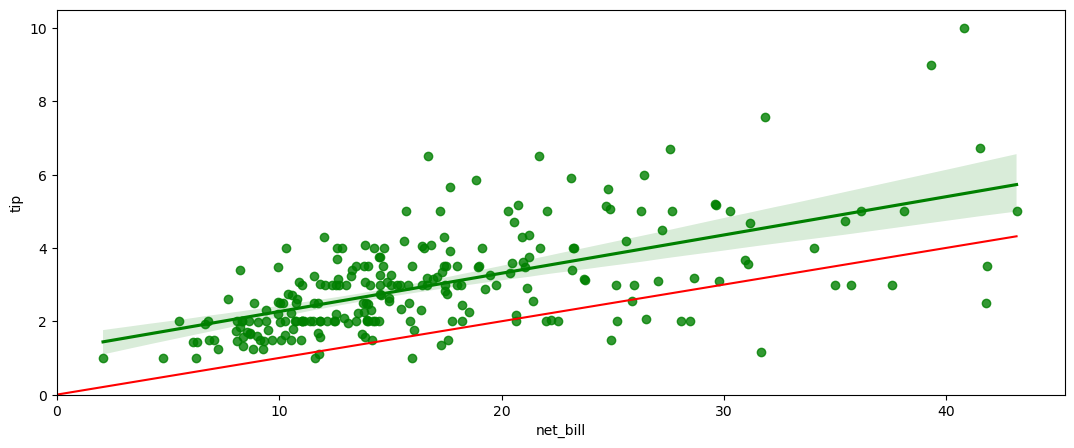

In [126]:
# Visualização gráfica 

# Gráfico de dispersão
plt.figure(figsize=[13,5])
sns.regplot(y='tip', x='net_bill', data=tips[tips['tip_pct'] < .5], color='green')

# linha dos 10%
x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1 * x

# Gerando a linha
plt.plot(x, y, color='red', label='linha dos 10%')

# Ajustando os eixos
plt.xlim(left=0)
plt.ylim(bottom=0)

In [127]:
# Gerando a análise de regressão 

regr = smf.ols('tip ~ net_bill', data=tips).fit()
# ols --> Ordinary Least Squares (mínimos quadrados ordinários)

regr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        16:23:21   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 45.225)

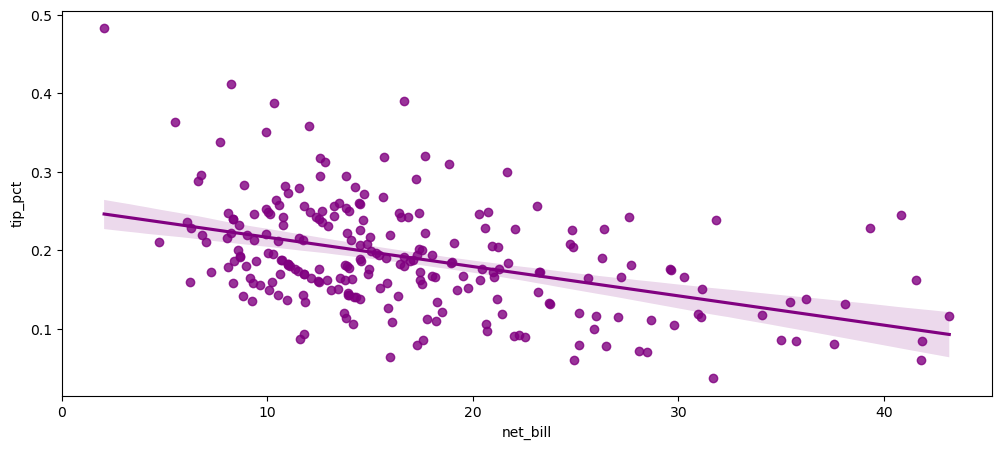

In [129]:

plt.figure(figsize=[12,5])
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct'] < .5], color='purple')

# x = np.linspace(0, tips['net_bill'].max(), 100)
# y = -.0037 * x  #+ 0.25
# plt.plot(x, y, color='blue', lw=2)

plt.xlim(left=0)
# plt.ylim(bottom=0)

In [130]:
# Gerando a análise de regressão 

regr_2 = smf.ols('tip_pct ~ net_bill', data=tips).fit()
# ols --> Ordinary Least Squares (mínimos quadrados ordinários)

regr_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.52e-06
Time:                        16:23:21   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

## Insights

- Comparando o R-quadrado em ambos os gráficos pode-se notar que há uma diferença significativa entre eles, 0.33 para o primeiro e 0.09 para o segundo. Sendo assim, o primeiro gráfico é capaz de explicar uma maior variância dos dados, mesmo com seu valor de R-quadrado não sendo muito bom.

- Um outro fator interessante é a progressão dos gráficos. De acordo com o primeiro tem-se que quanto maior o valor total da conta, maior será a gorjeta. O segundo já indica que conforme o valor da conta aumenta a proporção paga em gorjeta diminui, ou seja, a maioria dos indivíduos com valores mais altos de conta pagam uma gorjeta abaixo dos 10%.


# 4. Ajuste do modelo em outra escala

Com o modelo no item 2, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [155]:
# 1) Os valores do .fit

tips['pred_tip_pct'] = regr_2.fittedvalues
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,pred_tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.163268
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,0.150546
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,0.178264
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,0.206534


In [136]:
# 2) 

pred_tips = tips['tip_pct'] * tips['net_bill']
pred_tips

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Length: 244, dtype: float64

In [159]:
tips['pred_tips'] = pred_tips
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,pred_tip_pct,pred_tips
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087,1.01
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951,1.66
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684,3.50
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107,3.31
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358,3.61
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.163268,5.92
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,0.150546,2.00
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,0.178264,2.00
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,0.206534,1.75


In [137]:
# 3) 

regr_2.rsquared

0.09129084920662944

In [138]:
# 4) 

regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        16:23:21   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# Os valores de R-quadrado 
print('--> R-quadrado para o modelo de "tip": {:.3f}%.'.format(regr.rsquared * 100))
print('--> R-quadrado para o modelo de "tip_pct": {:.3f}%.'.format(regr_2.rsquared * 100))

--> R-quadrado para o modelo de "tip": 33.254%.
--> R-quadrado para o modelo de "tip_pct": 9.129%.
